# ENTREGABLE 4

# INSTRUCCIONES

Utilizar el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas y aplicar las técnicas de normalización del entregable 3.

In [18]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [19]:
ruta = "/gdrive/MyDrive/EDEM/MachineLearning/Clasificacion/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Generar split de los datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

In [21]:
## A completar

data.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
y             object
dtype: object

In [22]:
# Vamos a separar entre categóricas y numéricas y a las categóricas le aplicaremos un label encoder.
from sklearn.preprocessing import LabelEncoder

num_cols = data.select_dtypes(include=['int64', 'float64'])
cat_cols = data.select_dtypes(include=['object'])

le = LabelEncoder()

for columna in cat_cols.columns:
    if cat_cols[columna].dtype == 'object':
        cat_cols[columna] = le.fit_transform(cat_cols[columna])
cat_cols.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [23]:
df_encoded = df_encoded = pd.concat([num_cols, cat_cols], axis=1)

column_order = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
                'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df_encoded = df_encoded[column_order]

df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143.0,1,0,2,5,8,261.0,1,-1.0,0,3,0
1,44,9,2,1,0,29.0,1,0,2,5,8,151.0,1,-1.0,0,3,0
2,33,2,1,1,0,2.0,1,1,2,5,8,76.0,1,-1.0,0,3,0
3,47,1,1,3,0,1506.0,1,0,2,5,8,92.0,1,-1.0,0,3,0
4,33,11,2,3,0,1.0,0,0,2,5,8,198.0,1,-1.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,51,9,1,2,0,825.0,0,0,0,17,9,977.0,3,-1.0,0,3,1
45185,71,5,0,0,0,1729.0,0,0,0,17,9,456.0,2,-1.0,0,3,1
45186,72,5,1,1,0,5715.0,0,0,0,17,9,1127.0,5,184.0,3,2,1
45187,57,1,1,1,0,668.0,0,0,1,17,9,508.0,4,-1.0,0,3,0


In [24]:
df_encoded.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance      float64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome       int64
y              int64
dtype: object

In [25]:
## A completar

# Separamos entre características y variable a predecir
X = df_encoded.drop('y', axis = 1)
y = df_encoded['y']

In [26]:
# A continuación normalizaremos las variables para poder introducirlas en el modelo.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
print(X_norm)

[[ 1.60698229 -0.10381171 -0.27582169 ... -0.41135213 -0.30093692
   0.44482209]
 [ 0.28851426  1.42405022  1.36830262 ... -0.41135213 -0.30093692
   0.44482209]
 [-0.7474249  -0.71495648 -0.27582169 ... -0.41135213 -0.30093692
   0.44482209]
 ...
 [ 2.92545031  0.20176068 -0.27582169 ...  1.4366855   1.27144865
  -0.56634876]
 [ 1.512806   -1.02052887 -0.27582169 ... -0.41135213 -0.30093692
   0.44482209]
 [-0.37071975 -0.71495648 -0.27582169 ...  1.47664307  5.46447683
  -1.5775196 ]]


In [27]:
# Se realiza el Split de los datos para después introducir en los distintos modelos
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.25, random_state = 42)

## MODELOS

### ARBOLES DE DECISIÓN

In [28]:
## A COMPLETAR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.8742255266418835


### KNN

In [29]:
## A COMPLETAR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors = 5

knc = KNeighborsClassifier(n_neighbors)

knc.fit(X_train, y_train)

y_pred = knc.predict(X_val)

accuracy_knc = accuracy_score(y_val, y_pred)

print("Precisión del modelo:", accuracy_knc)

Precisión del modelo: 0.8937865108868827


### SUPPORT VECTOR MACHINE

In [30]:
# A COMPLETAR SIN NORMALIZACIÓN
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_svm = accuracy_score(y_val, y_pred)

print("Precisión del modelo:", accuracy_svm)



Precisión del modelo: 0.8989201628606833


### REGRESION LOGÍSTICA

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

accuracy_logreg = accuracy_score(y_val, y_pred)

print("Precisión del modelo:", accuracy_logreg)

Precisión del modelo: 0.8898920162860683


### XGBOOST

In [32]:
pip install xgboost

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9061780846167463
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9966
           1       0.64      0.48      0.55      1332

    accuracy                           0.91     11298
   macro avg       0.78      0.72      0.75     11298
weighted avg       0.90      0.91      0.90     11298

Confusion Matrix:
[[9603  363]
 [ 697  635]]


### ENSEMBLES

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Crear un conjunto de datos de ejemplo
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.25, random_state=42)

# Entrenar modelos base
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Hacer predicciones con modelos base en el conjunto de validación
rf_pred_val = rf_model.predict(X_val)
gb_pred_val = gb_model.predict(X_val)
lr_pred_val = lr_model.predict(X_val)

# Combinar predicciones (votación mayoritaria)
ensemble_pred_val = np.array([rf_pred_val, gb_pred_val, lr_pred_val])
ensemble_pred_val = np.round(np.mean(ensemble_pred_val, axis=0)).astype(int)

# Evaluar el rendimiento del ensemble en el conjunto de validación
ensemble_accuracy_val = accuracy_score(y_val, ensemble_pred_val)
print("Accuracy del ensemble en el conjunto de validación:", ensemble_accuracy_val)


Accuracy del ensemble en el conjunto de validación: 0.9055585059302531


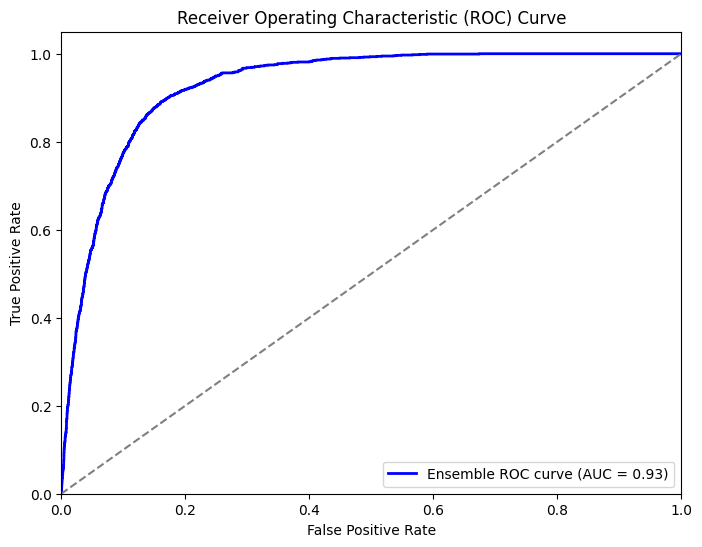

In [36]:
# Obtener las probabilidades de predicción en lugar de las etiquetas de predicción directas
rf_prob_val = rf_model.predict_proba(X_val)[:, 1]
gb_prob_val = gb_model.predict_proba(X_val)[:, 1]
lr_prob_val = lr_model.predict_proba(X_val)[:, 1]

# Calcular la probabilidad promedio
ensemble_prob_val = np.mean([rf_prob_val, gb_prob_val, lr_prob_val], axis=0)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_val, ensemble_prob_val)
auc = roc_auc_score(y_val, ensemble_prob_val)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Ensemble ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### GRID SEARCH

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Crear un conjunto de datos de ejemplo
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.25, random_state=42)

# Definir modelos base
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Definir ensemble
ensemble = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('lr', lr_model)
], voting='soft')

# Definir parámetros a buscar en el grid
params = {
    'rf__n_estimators': [50, 100, 200],
    'gb__n_estimators': [50, 100, 200],
    'lr__C': [0.1, 1.0, 10.0]
}

# Realizar GridSearch
grid_search = GridSearchCV(estimator=ensemble, param_grid=params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:", best_params)
print("Mejor score encontrado:", best_score)

# Entrenar ensemble con los mejores hiperparámetros en el conjunto de validación
best_ensemble = grid_search.best_estimator_
best_ensemble.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
ensemble_pred_val = best_ensemble.predict(X_val)

# Evaluar el rendimiento del ensemble en el conjunto de validación
ensemble_accuracy_val = accuracy_score(y_val, ensemble_pred_val)
print("Accuracy del ensemble en el conjunto de validación con mejores hiperparámetros:", ensemble_accuracy_val)


Mejores hiperparámetros encontrados: {'gb__n_estimators': 200, 'lr__C': 1.0, 'rf__n_estimators': 100}
Mejor score encontrado: 0.9035142073116756
Accuracy del ensemble en el conjunto de validación con mejores hiperparámetros: 0.9048504160028323


# Conclusiones

En general, una vez realizados todos los modelos, se puede observar que todos son bastante buenos (>0.88 de accuracy score).

Después del uso del dataset ya limpio y aplicar una diferentes modelos de machine learning, se pueden extraer las siguientes conclusiones:

- El ensamble de modelos ha demostrado ser el enfoque más efectivo, superando en rendimiento a todos los demás modelos probados, incluyendo árboles de decisión, KNN, SVM, regresión logística, XGBoost, entre otros, pese a que la puntuación de los mismos ha estado muy pareja, como se comentaba a principio de las conclusiones.

- La optimización de hiperparámetros, realizada mediante Grid Search, ha sido fundamental para maximizar el rendimiento de los modelos y mejorar su precisión predictiva.
